In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')

# Deformation

In [2]:
path = 'object5/deformation/'
#print(os.listdir(path))
x1_train = pd.read_csv(path+'a5_x1_d_train.csv')
x2_train = pd.read_csv(path+'a5_x2_d_train.csv')
f1_train = pd.read_csv(path+'a5_f_d_train.csv')
f1_test = pd.read_csv(path+'a5_f_d_test.csv')
x1_test = pd.read_csv(path+'a5_x1_d_test.csv')
x2_test = pd.read_csv(path+'a5_x2_d_test.csv')
print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
X_train = np.concatenate((x1_train,x2_train),axis=1)
X_test = np.concatenate((x1_test,x2_test),axis=1)
X_train.shape

116447 58223 116447 58223


(116447, 2)

In [5]:
Y_train,y_test = np.array(f1_train),np.array(f1_test)
def data(x,y,step=10):
    x_train,y_train = [],[]
    for i in range(4,len(y),step):
        x_i = [0]*10
        for j in range(5):
            x_i[j]=x[i-j,0]
            x_i[j+5]=x[i-j,1]
        x_train.append(x_i)
        y_train.append(y[i])
    return np.array(x_train),np.array(y_train)


In [6]:
x_train,y_train = data(X_train,Y_train)
x_test,y_test = data(X_test,y_test,1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(11645, 10) (11645, 1) (58219, 10) (58219, 1)


In [33]:
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

re_rf = []
error_rf = []
for i in range(len(y_test)):
    re_rf.append(abs(y1_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_rf.append(y1_pred[i]-y_test[i,0])

Time taken by Random Forest 0:00:08.508821
Root Mean Squared error of Random Forest 0.0904512187526763


In [26]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.060343
0:	learn: 1.3444091	total: 4.8ms	remaining: 4.79s
1:	learn: 1.2679821	total: 7.71ms	remaining: 3.85s
2:	learn: 1.1971886	total: 11.1ms	remaining: 3.7s
3:	learn: 1.1297597	total: 13.7ms	remaining: 3.42s
4:	learn: 1.0664227	total: 16ms	remaining: 3.18s
5:	learn: 1.0078333	total: 18.5ms	remaining: 3.06s
6:	learn: 0.9517258	total: 20.6ms	remaining: 2.93s
7:	learn: 0.8989471	total: 22.8ms	remaining: 2.83s
8:	learn: 0.8493514	total: 25.2ms	remaining: 2.77s
9:	learn: 0.8027097	total: 27.5ms	remaining: 2.72s
10:	learn: 0.7580410	total: 29.7ms	remaining: 2.67s
11:	learn: 0.7164198	total: 31.9ms	remaining: 2.63s
12:	learn: 0.6768581	total: 35.8ms	remaining: 2.72s
13:	learn: 0.6407491	total: 40ms	remaining: 2.82s
14:	learn: 0.6062916	total: 42.4ms	remaining: 2.78s
15:	learn: 0.5732850	total: 44.9ms	remaining: 2.76s
16:	learn: 0.5428119	total: 47.9ms	remaining: 2.77s
17:	learn: 0.5132449	total: 50.5ms	remaining: 2.76s
18:	learn: 0.4859875	total: 53ms	remaining: 2.73s


In [32]:
print('Time taken by CATBOOST Model: ',t2-t1)
y2_pred = cat.predict(x_test)
print('Root mean square error of CATBOOST Model: ',sqrt(mean_squared_error(y_test,y2_pred)))
    
re_cat = []
error_cat = []
for i in range(len(y_test)):
    re_cat.append(abs(y2_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_cat.append(y2_pred[i]-y_test[i,0])

Time taken by CATBOOST Model:  0:00:02.820996
Root mean square error of CATBOOST Model:  0.07904255296080293


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


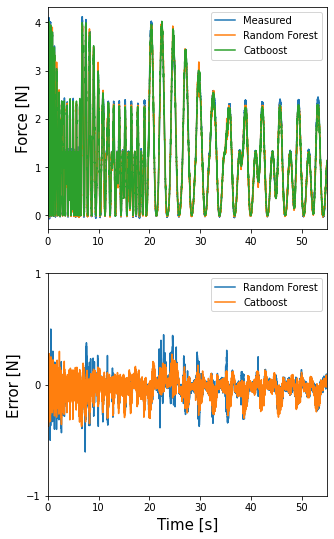

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(9)
fig.set_figwidth(5)

ax1.plot(np.arange(0,55,0.001),y_test[:55000],label = 'Measured')
ax1.plot(np.arange(0,55,0.001),y1_pred[:55000],label = 'Random Forest')
ax1.plot(np.arange(0,55,0.001),y2_pred[:55000],label = 'Catboost')
ax1.legend(loc = 'upper right')
ax1.set_xlim([0, 55])
ax1.set_ylabel('Force [N]',fontsize=15)
#ax1.set_xlabel('Time [s]',fontsize=15)

ax2.plot(np.arange(0,55,0.001),error_rf[:55000],label = 'Random Forest')
ax2.plot(np.arange(0,55,0.001),error_cat[:55000],label = 'Catboost')
ax2.legend(loc = 'upper right')
ax2.set_xlim([0, 55])
ax2.set_ylim([-1, 1])
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Error [N]',fontsize=15)
ax2.set_xlabel('Time [s]',fontsize=15)
plt.savefig('obj5_def.eps')
plt.savefig('obj5_def.pdf')
plt.show()

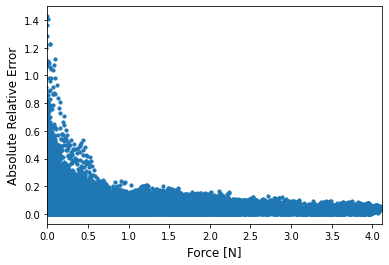

In [44]:
plt.scatter(y_test[:55000],re_cat[:55000],s=10)
plt.xlabel('Force [N]',fontsize=12)
plt.ylabel('Absolute Relative Error',fontsize=12)
plt.xlim([0,max(y_test)])
plt.savefig('abs_rel_err_obj5.pdf')
plt.savefig('abs_rel_err_obj5.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


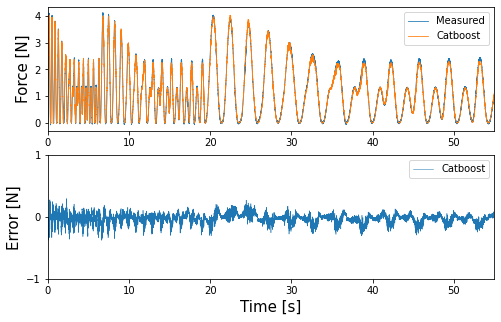

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(5)
fig.set_figwidth(8)

ax1.plot(np.arange(0,55,0.001),y_test[:55000],label = 'Measured',linewidth=0.8)
ax1.plot(np.arange(0,55,0.001),y2_pred[:55000],label = 'Catboost',linewidth=0.8)
ax1.legend(loc = 'upper right')
ax1.set_xlim([0, 55])
ax1.set_ylabel('Force [N]',fontsize=15)
#ax1.set_xlabel('Time [s]',fontsize=15)

ax2.plot(np.arange(0,55,0.001),error_cat[:55000],label = 'Catboost' ,linewidth=0.5)
ax2.legend(loc = 'upper right')
ax2.set_xlim([0, 55])
ax2.set_ylim([-1, 1])
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Error [N]',fontsize=15)
ax2.set_xlabel('Time [s]',fontsize=15)
plt.savefig('obj5_def_3.eps')
plt.savefig('obj5_def_3.pdf')
plt.show()